# Rf 6 0 7_Fitresult

Likelihood and minimization: demonstration of options of the RooFitResult class




**Author:** Clemens Lange, Wouter Verkerke (C++ version)  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 02:59 AM.</small></i>

In [1]:
from __future__ import print_function
import ROOT

Welcome to JupyROOT 6.18/03


Create pdf, data
--------------------------------

Declare observable x

In [2]:
x = ROOT.RooRealVar("x", "x", 0, 10)


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



Create two Gaussian PDFs g1(x,mean1,sigma) anf g2(x,mean2,sigma) and
their parameters

In [3]:
mean = ROOT.RooRealVar("mean", "mean of gaussians", 5, -10, 10)
sigma1 = ROOT.RooRealVar("sigma1", "width of gaussians", 0.5, 0.1, 10)
sigma2 = ROOT.RooRealVar("sigma2", "width of gaussians", 1, 0.1, 10)

sig1 = ROOT.RooGaussian("sig1", "Signal component 1", x, mean, sigma1)
sig2 = ROOT.RooGaussian("sig2", "Signal component 2", x, mean, sigma2)

Build Chebychev polynomial p.d.f.

In [4]:
a0 = ROOT.RooRealVar("a0", "a0", 0.5, 0., 1.)
a1 = ROOT.RooRealVar("a1", "a1", -0.2)
bkg = ROOT.RooChebychev("bkg", "Background", x, ROOT.RooArgList(a0, a1))

Sum the signal components into a composite signal p.d.f.

In [5]:
sig1frac = ROOT.RooRealVar(
    "sig1frac", "fraction of component 1 in signal", 0.8, 0., 1.)
sig = ROOT.RooAddPdf(
    "sig", "Signal", ROOT.RooArgList(sig1, sig2), ROOT.RooArgList(sig1frac))

Sum the composite signal and background

In [6]:
bkgfrac = ROOT.RooRealVar("bkgfrac", "fraction of background", 0.5, 0., 1.)
model = ROOT.RooAddPdf(
    "model", "g1+g2+a", ROOT.RooArgList(bkg, sig), ROOT.RooArgList(bkgfrac))

Generate 1000 events

In [7]:
data = model.generate(ROOT.RooArgSet(x), 1000)

Fit pdf to data, save fit result
-------------------------------------------------------------

Perform fit and save result

In [8]:
r = model.fitTo(data, ROOT.RooFit.Save())

[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
[#1] INFO:Minization --  The following expressions will be evaluated in cache-and-track mode: (bkg,sig1,sig2)
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 a0           5.00000e-01  1.00000e-01    0.00000e+00  1.00000e+00
     2 bkgfrac      5.00000e-01  1.00000e-01    0.00000e+00  1.00000e+00
     3 mean         5.00000e+00  2.00000e+00   -1.00000e+01  1.00000e+01
     4 sig1frac     8.00000e-01  1.00000e-01    0.00000e+00  1.00000e+00
     5 sigma1       5.00000e-01  2.00000e-01    1.00000e-01  1.00000e+01
     6 sigma2       1.00000e+00  4.50000e-01    1.00000e-01  1.00000e+01
 **********
 **    3 **SET ERR         0.5
 **********
 **********
 **    4 **SET PRINT           1
 **********
 **********
 **    5 **SET STR           1
 **********
 NOW USING STRATEGY

Print fit results
---------------------------------

Summary printing: Basic info plus final values of floating fit parameters

In [9]:
r.Print()


  RooFitResult: minimized FCN value: 1885.34, estimated distance to minimum: 0.000205499
                covariance matrix quality: Full, accurate covariance matrix
                Status : MINIMIZE=0 HESSE=0 

    Floating Parameter    FinalValue +/-  Error   
  --------------------  --------------------------
                    a0    7.2825e-01 +/-  1.11e-01
               bkgfrac    4.3439e-01 +/-  8.36e-02
                  mean    5.0346e+00 +/-  3.36e-02
              sig1frac    7.7835e-01 +/-  9.70e-02
                sigma1    5.2340e-01 +/-  4.51e-02
                sigma2    1.7767e+00 +/-  1.16e+00



Verbose printing: Basic info, of constant parameters, and
final values of floating parameters, correlations

In [10]:
r.Print("v")


  RooFitResult: minimized FCN value: 1885.34, estimated distance to minimum: 0.000205499
                covariance matrix quality: Full, accurate covariance matrix
                Status : MINIMIZE=0 HESSE=0 

    Constant Parameter    Value     
  --------------------  ------------
                    a1   -2.0000e-01

    Floating Parameter  InitialValue    FinalValue +/-  Error     GblCorr.
  --------------------  ------------  --------------------------  --------
                    a0    5.0000e-01    7.2825e-01 +/-  1.11e-01  <none>
               bkgfrac    5.0000e-01    4.3439e-01 +/-  8.36e-02  <none>
                  mean    5.0000e+00    5.0346e+00 +/-  3.36e-02  <none>
              sig1frac    8.0000e-01    7.7835e-01 +/-  9.70e-02  <none>
                sigma1    5.0000e-01    5.2340e-01 +/-  4.51e-02  <none>
                sigma2    1.0000e+00    1.7767e+00 +/-  1.16e+00  <none>



Visualize correlation matrix
-------------------------------------------------------

Construct 2D color plot of correlation matrix

In [11]:
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetPalette(1)
hcorr = r.correlationHist()

Visualize ellipse corresponding to single correlation matrix element

In [12]:
frame = ROOT.RooPlot(sigma1, sig1frac, 0.45, 0.60, 0.65, 0.90)
frame.SetTitle("Covariance between sigma1 and sig1frac")
r.plotOn(frame, sigma1, sig1frac, "ME12ABHV")

<ROOT.RooPlot object ("frame_561d3cac11b0") at 0x561d3cac11b0>

Access fit result information
---------------------------------------------------------

Access basic information

In [13]:
print("EDM = ", r.edm())
print("-log(L) minimum = ", r.minNll())

EDM =  0.000205499151431
-log(L) minimum =  1885.34381531


Access list of final fit parameter values

In [14]:
print("final value of floating parameters")
r.floatParsFinal().Print("s")

final value of floating parameters
  1) RooRealVar::       a0 = 0.728245 +/- 0.111109
  2) RooRealVar::  bkgfrac = 0.434386 +/- 0.0836079
  3) RooRealVar::     mean = 5.03463 +/- 0.0336219
  4) RooRealVar:: sig1frac = 0.778347 +/- 0.0969912
  5) RooRealVar::   sigma1 = 0.523396 +/- 0.0451307
  6) RooRealVar::   sigma2 = 1.77668 +/- 1.15533


Access correlation matrix elements

In [15]:
print("correlation between sig1frac and a0 is  ", r.correlation(
    sig1frac, a0))
print("correlation between bkgfrac and mean is ", r.correlation(
    "bkgfrac", "mean"))

correlation between sig1frac and a0 is   -0.377851195167
correlation between bkgfrac and mean is  -0.0510231643053


Extract covariance and correlation matrix as ROOT.TMatrixDSym

In [16]:
cor = r.correlationMatrix()
cov = r.covarianceMatrix()

Print correlation, matrix

In [17]:
print("correlation matrix")
cor.Print()
print("covariance matrix")
cov.Print()

correlation matrix
covariance matrix

6x6 matrix is as follows

     |      0    |      1    |      2    |      3    |      4    |
----------------------------------------------------------------------
   0 |          1     -0.7952    -0.02552     -0.3779      0.4111 
   1 |    -0.7952           1    -0.05102      0.6023     -0.3876 
   2 |   -0.02552    -0.05102           1     -0.0873    -0.04206 
   3 |    -0.3779      0.6023     -0.0873           1      0.2966 
   4 |     0.4111     -0.3876    -0.04206      0.2966           1 
   5 |     0.8272     -0.8708     0.01245     -0.2609      0.5799 


     |      5    |
----------------------------------------------------------------------
   0 |     0.8272 
   1 |    -0.8708 
   2 |    0.01245 
   3 |    -0.2609 
   4 |     0.5799 
   5 |          1 


6x6 matrix is as follows

     |      0    |      1    |      2    |      3    |      4    |
----------------------------------------------------------------------
   0 |    0.01261   -0.0

Persist fit result in root file
-------------------------------------------------------------

Open ROOT file save save result

In [18]:
f = ROOT.TFile("rf607_fitresult.root", "RECREATE")
r.Write("rf607")
f.Close()

In a clean ROOT session retrieve the persisted fit result as follows:
r = gDirectory.Get("rf607")

In [19]:
c = ROOT.TCanvas("rf607_fitresult", "rf607_fitresult", 800, 400)
c.Divide(2)
c.cd(1)
ROOT.gPad.SetLeftMargin(0.15)
hcorr.GetYaxis().SetTitleOffset(1.4)
hcorr.Draw("colz")
c.cd(2)
ROOT.gPad.SetLeftMargin(0.15)
frame.GetYaxis().SetTitleOffset(1.6)
frame.Draw()

c.SaveAs("rf607_fitresult.png")

Info in <TCanvas::Print>: png file rf607_fitresult.png has been created


Draw all canvases 

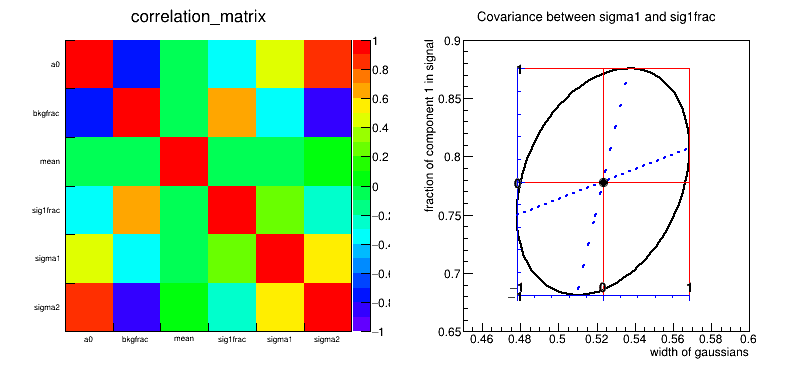

In [20]:
from ROOT import gROOT 
gROOT.GetListOfCanvases().Draw()